In [51]:
import numpy as np
import pandas as pd
import os
import sklearn 

In [52]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns 

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten

from tensorflow.keras.layers import Conv2D,MaxPool2D

from tensorflow.keras.layers import Input, Dense
from keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16


In [53]:
PATH = os.getcwd()
print(PATH)
PATH = r"C:\Users\Abdur Rahman\Desktop\out"
data_dir_list = os.listdir(PATH)
data_dir_list.sort(key=int)
print(data_dir_list)

C:\Users\Abdur Rahman
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35']


In [54]:
img_rows=90
img_cols=90
num_channel=3

num_epoch = 10
batch_size = 64

img_data_list=[]
classes_names_list=[]
target_column=[]

In [55]:
for dataset in data_dir_list:
    classes_names_list.append(dataset)
    print("Getting images from {} folder\n".format(dataset))
    img_list = os.listdir(PATH+'/'+ dataset)
    for img in img_list:
        input_img = cv2.imread(PATH + '/' + dataset + '/' + img)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        target_column.append(dataset)

Getting images from 1 folder

Getting images from 2 folder

Getting images from 3 folder

Getting images from 4 folder

Getting images from 5 folder

Getting images from 6 folder

Getting images from 7 folder

Getting images from 8 folder

Getting images from 9 folder

Getting images from 10 folder

Getting images from 11 folder

Getting images from 12 folder

Getting images from 13 folder

Getting images from 14 folder

Getting images from 15 folder

Getting images from 16 folder

Getting images from 17 folder

Getting images from 18 folder

Getting images from 19 folder

Getting images from 20 folder

Getting images from 21 folder

Getting images from 22 folder

Getting images from 23 folder

Getting images from 24 folder

Getting images from 25 folder

Getting images from 26 folder

Getting images from 27 folder

Getting images from 28 folder

Getting images from 29 folder

Getting images from 30 folder

Getting images from 31 folder

Getting images from 32 folder

Getting images fr

In [56]:
num_classes = len(classes_names_list)
print(num_classes)

35


In [57]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print(img_data.shape)

(37100, 90, 90, 3)


In [58]:
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape

In [59]:
Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)
np.unique(target_column)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34], dtype=int64)

In [60]:
target_column_hotcoded = to_categorical(target_column,num_classes)
X,Y = shuffle(img_data,target_column_hotcoded,random_state=2)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [61]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [62]:
classifier = Sequential()

classifier.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', input_shape = (90, 90, 3)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(.2))

classifier.add(Dense(units = 35, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [63]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 88, 88, 128)       3584      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 44, 44, 128)      0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 44, 44, 128)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 42, 42, 64)        73792     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 21, 21, 64)       0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 21, 21, 64)       

In [40]:
hist = classifier.fit(X_train,y_train,batch_size=batch_size,epochs=num_epoch,verbose=1,validation_data=(X_test,y_test))
score = classifier.evaluate(X_test,y_test,batch_size=batch_size)
print('Test Loss',score[0])
print("Test Accuracy",score[1])

Epoch 1/10
464/464 [==============================] - 863s 2s/step - loss: 1.0411 - accuracy: 0.7111 - val_loss: 0.0428 - val_accuracy: 0.9716
Epoch 2/10
464/464 [==============================] - 833s 2s/step - loss: 0.0653 - accuracy: 0.9647 - val_loss: 0.0400 - val_accuracy: 0.9730
Epoch 3/10
464/464 [==============================] - 833s 2s/step - loss: 0.0531 - accuracy: 0.9685 - val_loss: 0.0412 - val_accuracy: 0.9714
Epoch 4/10
464/464 [==============================] - 878s 2s/step - loss: 0.0506 - accuracy: 0.9676 - val_loss: 0.0381 - val_accuracy: 0.9743
Epoch 5/10
464/464 [==============================] - 842s 2s/step - loss: 0.0507 - accuracy: 0.9683 - val_loss: 0.0392 - val_accuracy: 0.9743
Epoch 6/10
464/464 [==============================] - 841s 2s/step - loss: 0.0479 - accuracy: 0.9684 - val_loss: 0.0382 - val_accuracy: 0.9722
Epoch 7/10
464/464 [==============================] - 842s 2s/step - loss: 0.0492 - accuracy: 0.9683 - val_loss: 0.0392 - val_accuracy: 0.9698

In [41]:
classifier.save(r'C:\Users\Abdur Rahman\Desktop\Sign_language\model_1')

INFO:tensorflow:Assets written to: C:\Users\Abdur Rahman\Desktop\Sign_language\model_1\assets


INFO:tensorflow:Assets written to: C:\Users\Abdur Rahman\Desktop\Sign_language\model_1\assets


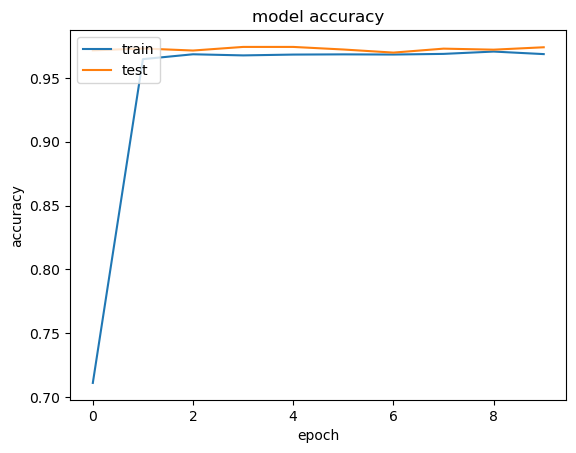

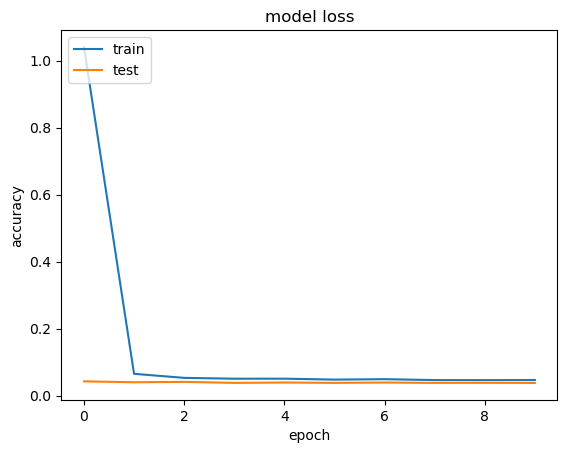

In [42]:
#Summarize hist for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

#summarize hist for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [44]:
preds = np.round(classifier.predict((X_test)),0)
print("rounded test_labels",preds)

232/232 [==============================] - 40s 169ms/step
rounded test_labels [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [45]:
test_labels = np.array((y_test))

In [46]:
experiment_labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35']
classification_metrics = metrics.classification_report(test_labels,preds,target_names=experiment_labels)
print(classification_metrics)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       213
           2       1.00      1.00      1.00       228
           3       1.00      1.00      1.00       206
           4       1.00      1.00      1.00       202
           5       1.00      1.00      1.00       244
           6       1.00      1.00      1.00       229
           7       1.00      1.00      1.00       200
           8       1.00      1.00      1.00       229
           9       1.00      1.00      1.00       205
          10       1.00      1.00      1.00       218
          11       1.00      1.00      1.00       218
          12       1.00      1.00      1.00       184
          13       1.00      1.00      1.00       208
          14       1.00      1.00      1.00       221
          15       1.00      1.00      1.00       203
          16       1.00      1.00      1.00       229
          17       1.00      1.00      1.00       202
          18       1.00    

232/232 [==============================] - 39s 167ms/step


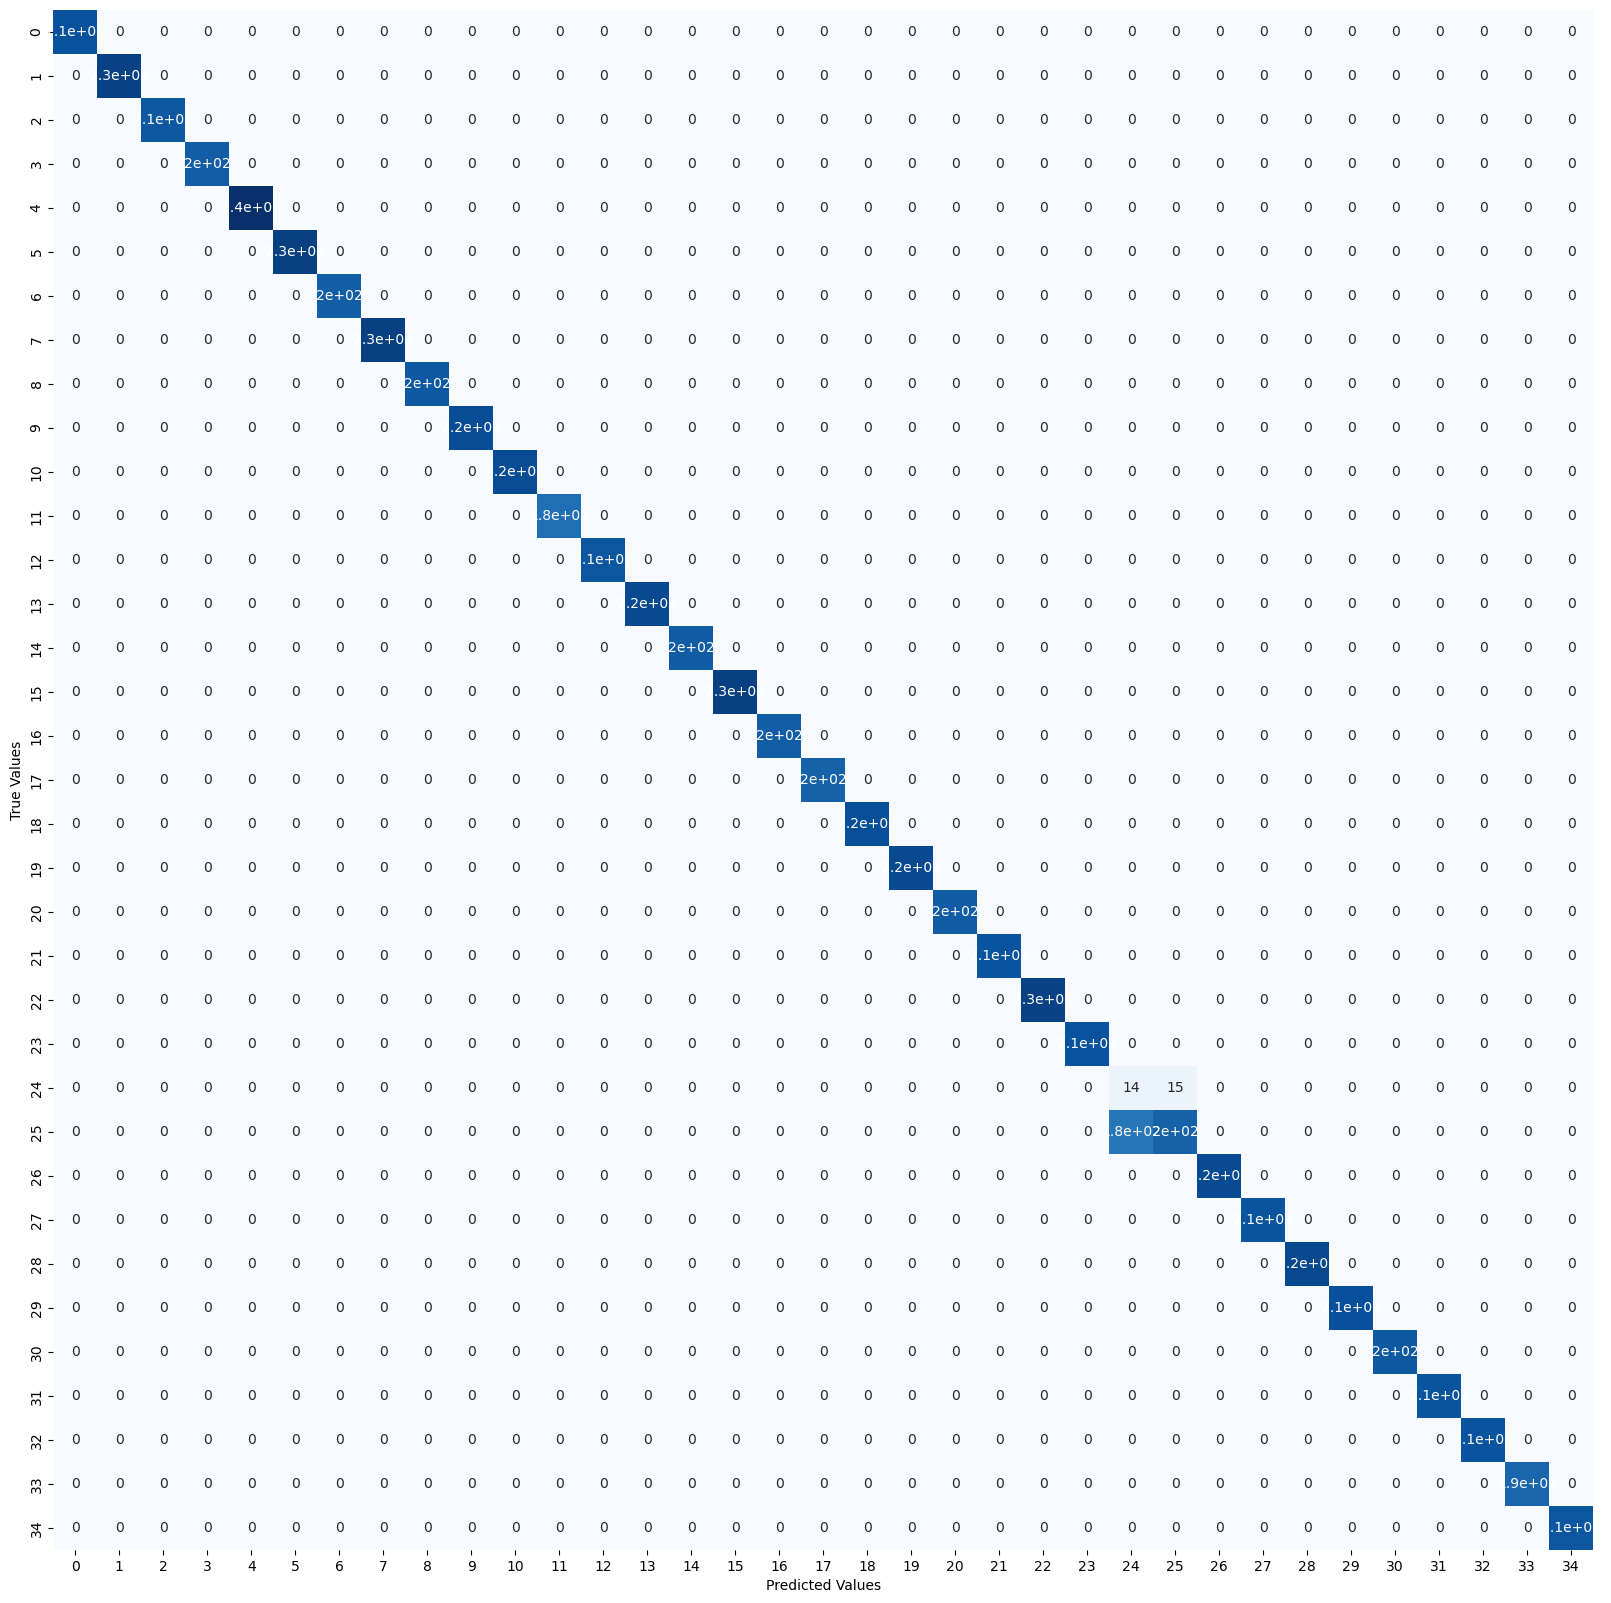

In [48]:
fig = plt.figure(figsize=(20, 20))

pred = classifier.predict(X_test)

pred = np.argmax(pred, 1)
test = np.argmax(y_test, 1)

mat = confusion_matrix(test,pred)

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();